In [1]:
import pandas as pd
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('http://sbrfdata.ru/opendata.zip',encoding='cp1251')

In [8]:
# some handy functions to use along widgets
from IPython.display import display, Markdown, clear_output
# widget packages
import ipywidgets as widgets
# defining some widgets
# calendar = widgets.DatePicker(
#           description='Select Date')
menu = widgets.Dropdown(
       options=df['region'].unique(),
       value=df['region'][0],
       description='Регион:')
parameters = widgets.Dropdown(
       options=df['name'].unique(),
       value=df['name'][0],
       description='Параметр:')
df.loc[:,'date_year']=[i.split('-')[0] for i in df.loc[:,'date']]
date_range = df['date_year'].unique()
date_year_start = widgets.Dropdown(
       options=date_range,
       value=date_range[0],
       description='Год (начало):')
date_year_end = widgets.Dropdown(
       options=date_range,
       value=date_range[-1],
       description='Год (конец):')
quantile = widgets.Dropdown(
       options=[0.1,0.2,0.3,0.5,0.7,0.9],
       value=0.5,
       description='Квантиль:')

In [9]:
box = widgets.VBox([menu,parameters,date_year_start,date_year_end,quantile])
box

	Представлены статистические данные по:
        региону Россия,
        а также по выбранному параметру - по всей стране (регионы с показателями выше 0.5-квантиля)
        за 2013-2019 годы.


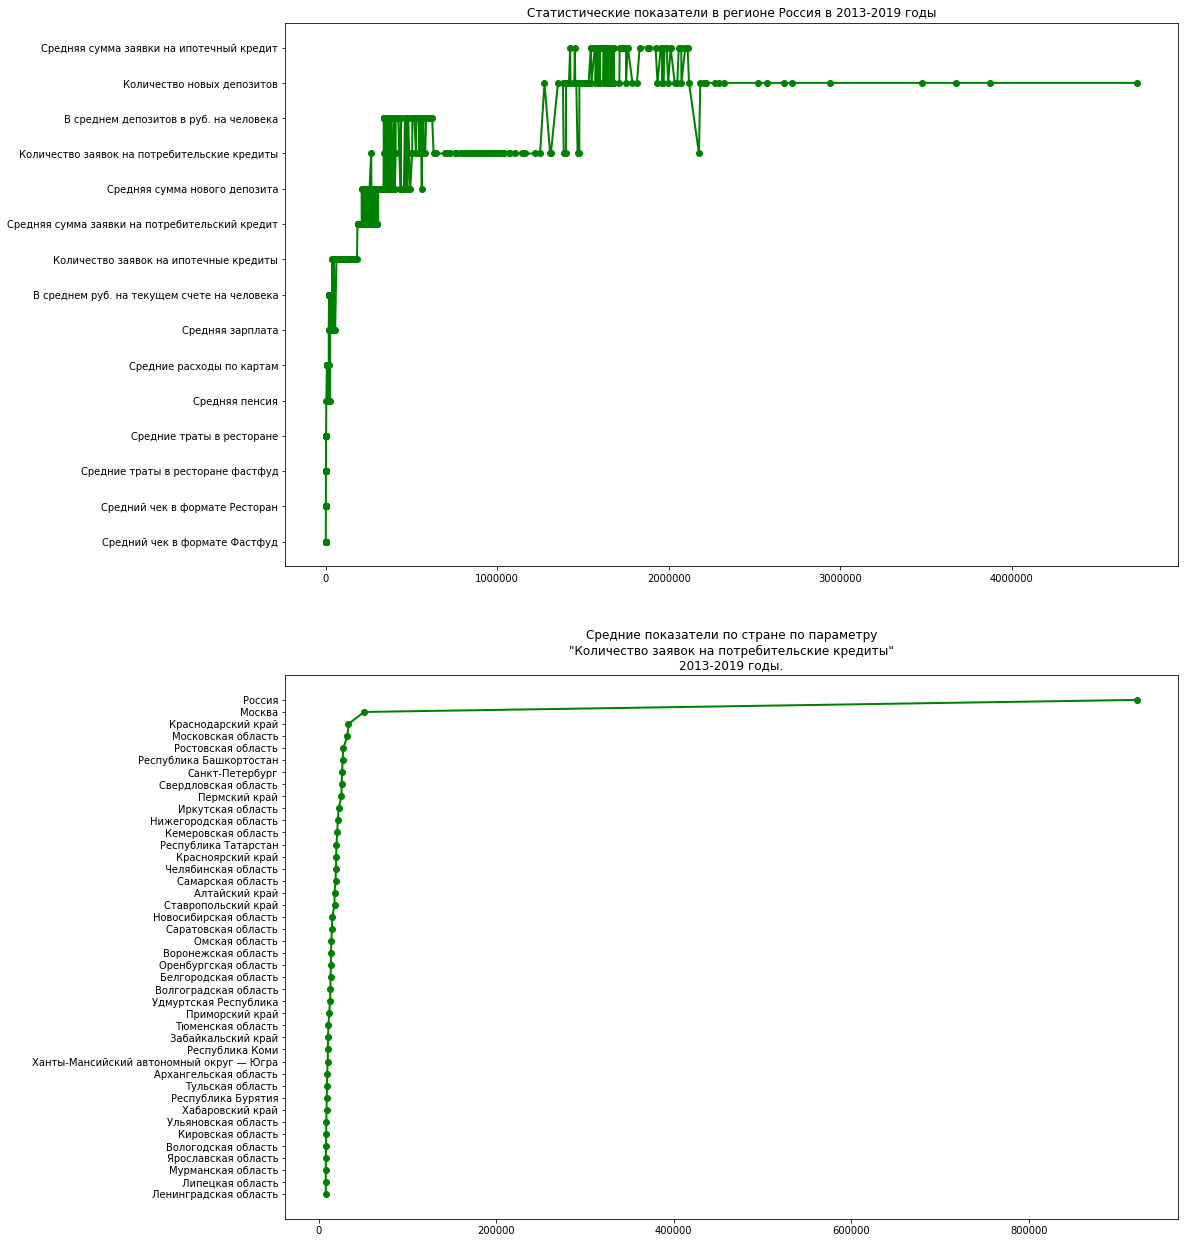

In [10]:
checked_region = menu.value
checked_year_start = date_year_start.value
checked_year_end = date_year_end.value
checked_parameter = parameters.value
checked_quantile = quantile.value
data_set1 = df.loc[(df['region']==checked_region)&((df['date_year']>=checked_year_start)&(df['date_year']<=checked_year_end)),:].sort_values('value')
data_set2 = df.loc[(df['date_year']>=checked_year_start)&(df['date_year']<=checked_year_end),:].groupby(['region','name']).mean().sort_values('value').xs(checked_parameter,level='name')

fig,ax = plt.subplots(2,1,figsize=(16,22))
ax[0].plot(data_set1['value'],data_set1['name'], 'go-', label='line 1', linewidth=2)
ax[0].set_title(f'Статистические показатели в регионе {checked_region} в {checked_year_start}-{checked_year_end} годы')
#plt.title(checked_region)
ax[1].plot(data_set2[data_set2['value']>data_set2['value'].quantile(q = checked_quantile)]['value'],data_set2[data_set2['value']>data_set2['value'].quantile(q = checked_quantile)].index, 'go-', label='line 1', linewidth=2)
ax[1].set_title(f'Средние показатели по стране по параметру\n"{checked_parameter}"\n{checked_year_start}-{checked_year_end} годы.')

print(f'\tПредставлены статистические данные по:\n\
        региону {checked_region},\n\
        а также по выбранному параметру - по всей стране (регионы с показателями выше {checked_quantile}-квантиля)\n\
        за {checked_year_start}-{checked_year_end} годы.')
